In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from influxdb import *
# import Config as cg
from influxdb import DataFrameClient
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt                    # plots
import seaborn as sns 
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics


In [2]:
INFLUX_DB_IP = '10.12.97.178'
INFLUX_DB_PORT = 8086
INFLUX_DB = 'demoDb'
TARGET_MEASUREMENT = 'Energy24'
con_obj = InfluxDBClient(host=INFLUX_DB_IP, port=INFLUX_DB_PORT, database=INFLUX_DB)
query = 'select * from ' + TARGET_MEASUREMENT + ' where time > now() - 40d '
df1 = pd.DataFrame(con_obj.query(query).get_points())
df1['time'] = df1['time'].astype('datetime64[ns]')
df1['time'] = df1['time'] + timedelta(hours=5, minutes=30)
df1=df1[['EM4','time']]
df1.set_index('time',inplace=True)


In [3]:
Time_range = pd.DataFrame(pd.date_range(start=(df1.index.min()), end=(df1.index.max()), freq='H'))
Time_range = Time_range.rename(columns={0: "time"})
Time_range.set_index("time", inplace=True)
df1 = df1.merge(Time_range, how="outer", right_index=True, left_index=True)
#df=df.drop('time',axis=1)
df1.index.freq = 'H'
df1 = df1.interpolate(method='time')

In [4]:
TARGET_MEASUREMENT = 'NN'
con_obj = InfluxDBClient(host=INFLUX_DB_IP, port=INFLUX_DB_PORT, database=INFLUX_DB)
query = 'select * from ' + TARGET_MEASUREMENT + ' where time > now() - 40d '
df2 = pd.DataFrame(con_obj.query(query).get_points())
df2['time'] = df2['time'].astype('datetime64[ns]')
df2['time'] = df2['time'] + timedelta(hours=5, minutes=30)



In [5]:
Time_range = pd.DataFrame(pd.date_range(start=(df2.time.min()), end=(df2.time.max()), freq='H'))
Time_range = Time_range.rename(columns={0: "time"})
Time_range.set_index("time", inplace=True)
df2.set_index('time',inplace=True)
df2 = df2.merge(Time_range, how="outer", right_index=True, left_index=True)
#df=df.drop('time',axis=1)
df2.index.freq = 'H'
df2 = df2.interpolate(method='time')

In [6]:
df1=df1[df2.index.min():]
df2=df2[:df1.index.max()]

In [7]:
df=df1.merge(df2,on='time')

In [8]:
TARGET_MEASUREMENT = 'Model'
con_obj = InfluxDBClient(host=INFLUX_DB_IP, port=INFLUX_DB_PORT, database=INFLUX_DB)
query = 'select * from ' + TARGET_MEASUREMENT + ' where time > now() - 40d '
df3 = pd.DataFrame(con_obj.query(query).get_points())
df3['time'] = df3['time'].astype('datetime64[ns]')
df3['time'] = df3['time'] + timedelta(hours=5, minutes=30)
df3.set_index('time',inplace=True)



In [9]:
Time_range = pd.DataFrame(pd.date_range(start=(df3.index.min()), end=(df3.index.max()), freq='H'))
Time_range = Time_range.rename(columns={0: "time"})
Time_range.set_index("time", inplace=True)
Time_range

""
time
2020-07-23 12:00:00
2020-07-23 13:00:00
2020-07-23 14:00:00
2020-07-23 15:00:00
2020-07-23 16:00:00
...
2020-08-27 13:00:00
2020-08-27 14:00:00
2020-08-27 15:00:00


In [10]:
df3 = df3.merge(Time_range, how="outer", right_index=True, left_index=True)
df3 = df3.interpolate(method='time')
df3=df3.drop('EM4',axis=1)
#dff=df1.merge(df3, how="outer", right_index=True, left_index=True)

In [11]:
df=df3.merge(df,how='inner',left_index=True,right_index=True)

In [12]:
df

,EM4_ar,EM4_hw,EM4_sr,HP,lower_bound_80,lower_bound_95,lower_bound_ar,lower_bound_hw,lower_bound_sr,upper_bound_80,...,upper_bound_ar,upper_bound_hw,upper_bound_sr,EM4,EM4_lstm,EM4_mlp,lower_bound_lstm,lower_bound_mlp,upper_bound_lstm,upper_bound_mlp
time,,,,,,,,,,,,,,,,,,,,,
2020-08-06 15:00:00,84.125807,92.380410,110.727108,22.0,NaN,NaN,31.159838,51.554869,70.791896,NaN,...,137.091777,133.205951,150.662321,3.0,131.10590,431.000300,50.572227,314.167707,211.63956,547.832903
2020-08-06 16:00:00,117.949742,137.779462,131.103288,30.0,NaN,NaN,63.835603,98.866068,91.004802,NaN,...,172.063880,176.692855,171.201775,4.0,137.30377,94.997700,117.125590,84.954027,157.48196,105.041380
2020-08-06 17:00:00,74.881350,108.301427,118.879160,30.0,NaN,NaN,18.807185,67.062741,75.163575,NaN,...,130.955515,149.540113,162.594744,12.0,129.52540,380.586180,41.743744,278.621816,217.30707,482.550548
2020-08-06 18:00:00,60.728758,81.508749,98.041562,22.0,NaN,NaN,5.675227,41.513585,50.603626,NaN,...,115.782290,121.503914,145.479498,75.0,125.47664,496.495270,24.654953,351.711597,226.29832,641.278942
2020-08-06 19:00:00,62.139062,75.841386,67.862804,23.0,NaN,NaN,2.424227,28.609818,18.064347,NaN,...,121.853897,123.072955,117.661262,10.0,127.99823,214.558090,34.521133,166.500067,221.47533,262.616113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27 12:00:00,88.216458,97.036662,87.402823,28.0,0.0,0.0,13.221545,56.748252,17.024020,88.485023,...,163.211372,137.325072,157.781627,68.0,132.02695,42.595830,56.542755,28.065693,207.51114,57.125965
2020-08-27 13:00:00,60.067143,80.434976,75.575529,27.0,0.0,0.0,0.000000,25.559445,1.667367,88.485023,...,138.012268,135.310506,149.483690,102.0,119.80149,52.217216,8.607048,52.144500,230.99594,52.289933
2020-08-27 14:00:00,79.196138,106.624263,76.243091,28.0,0.0,0.0,7.536819,41.011064,7.769063,88.485023,...,150.855457,172.237462,144.717119,106.0,131.34547,143.395050,52.058900,123.176986,210.63205,163.613114


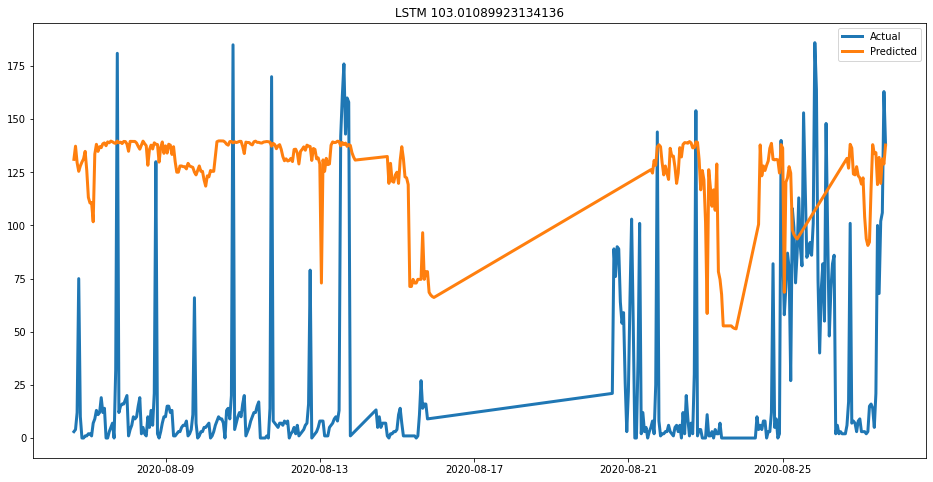

In [13]:
plt.figure(figsize=(16,8))
# plt.plot(train_y, label = "Training")
plt.plot(df['EM4'], label='Actual', lw = 3)
plt.plot(df['EM4_lstm'], label='Predicted', lw = 3)
plt.legend(loc='best')
rmse = sqrt(mean_squared_error(df['EM4_lstm'],df['EM4']))
plt.title('LSTM'+" " +str(rmse))
plt.show()

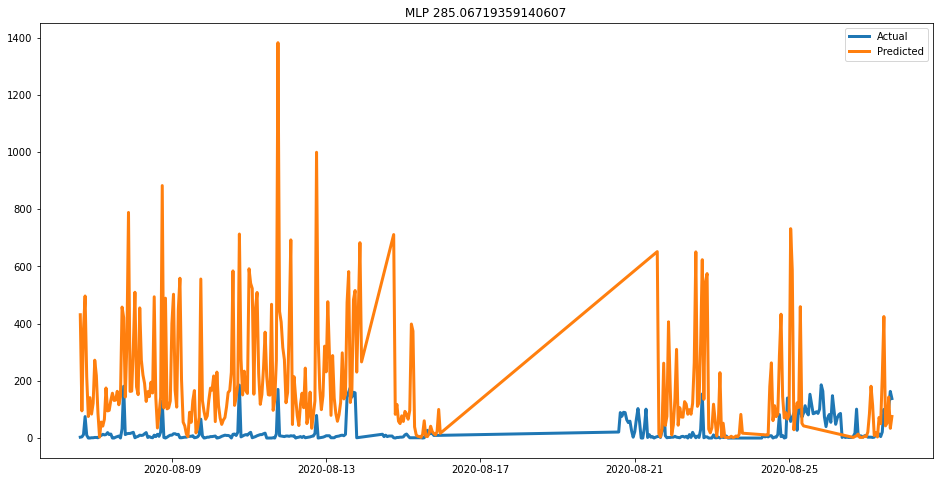

In [14]:
plt.figure(figsize=(16,8))
# plt.plot(train_y, label = "Training")
plt.plot(df['EM4'], label='Actual', lw = 3)
plt.plot(df['EM4_mlp'], label='Predicted', lw = 3)
plt.legend(loc='best')
rmse = sqrt(mean_squared_error(df['EM4_mlp'],df['EM4']))
plt.title('MLP'+" " +str(rmse))
plt.show()

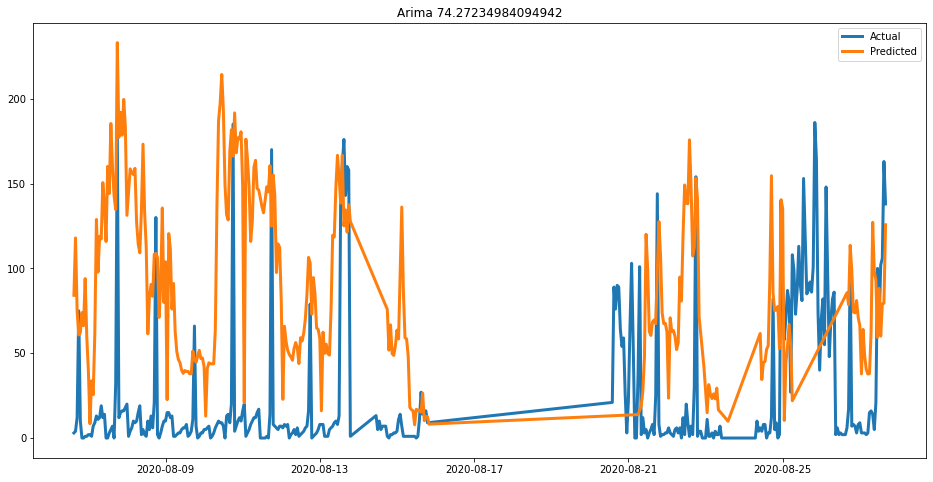

In [15]:
plt.figure(figsize=(16,8))
# plt.plot(train_y, label = "Training")
plt.plot(df['EM4'], label='Actual', lw = 3)
plt.plot(df['EM4_ar'], label='Predicted', lw = 3)
plt.legend(loc='best')
rmse = sqrt(mean_squared_error(df['EM4_ar'],df['EM4']))
plt.title('Arima'+" " +str(rmse))
plt.show()

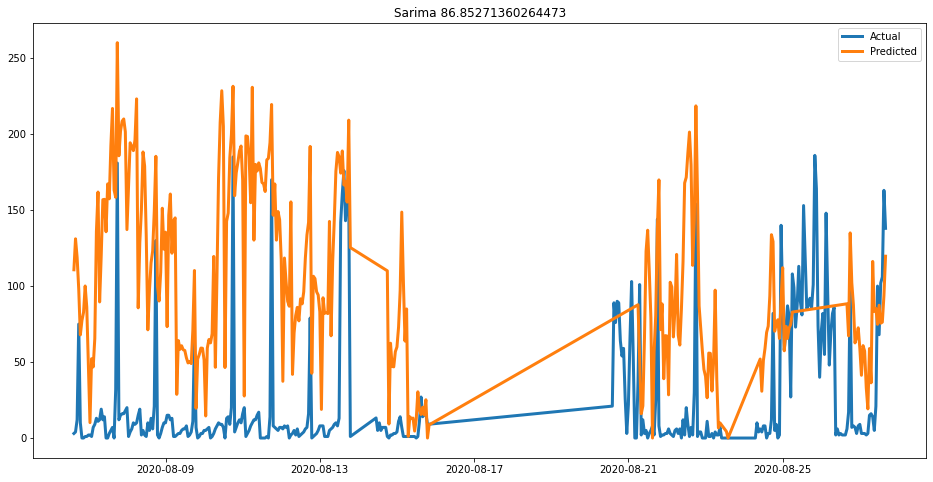

In [16]:
plt.figure(figsize=(16,8))
# plt.plot(train_y, label = "Training")
plt.plot(df['EM4'], label='Actual', lw = 3)
plt.plot(df['EM4_sr'], label='Predicted', lw = 3)
plt.legend(loc='best')
rmse = sqrt(mean_squared_error(df['EM4_sr'],df['EM4']))
plt.title('Sarima'+" " +str(rmse))
plt.show()

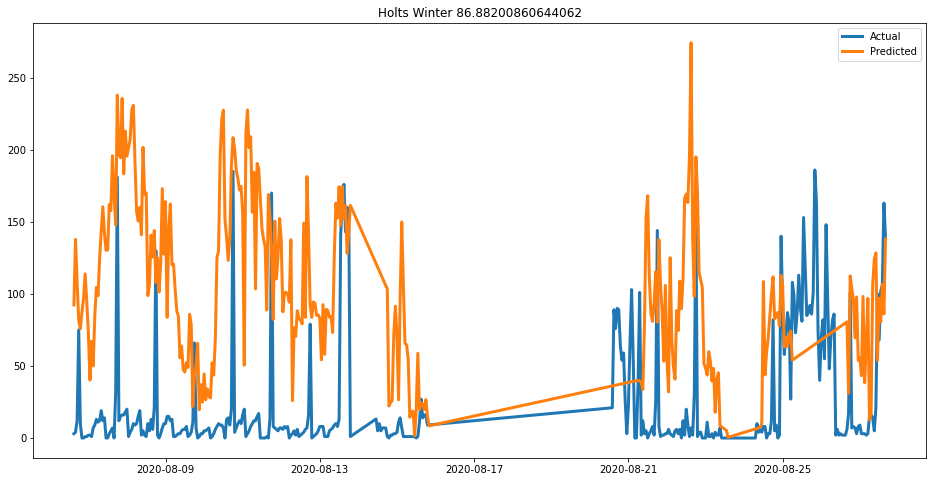

In [17]:
plt.figure(figsize=(16,8))
# plt.plot(train_y, label = "Training")
plt.plot(df['EM4'], label='Actual', lw = 3)
plt.plot(df['EM4_hw'], label='Predicted', lw = 3)
plt.legend(loc='best')
rmse = sqrt(mean_squared_error(df['EM4_hw'],df['EM4']))
plt.title('Holts Winter'+" " +str(rmse))
plt.show()

In [18]:
#df.to_excel("Actual_Predicted_data.xlsx")